High-resolution profile of neoantigen-specific TCR activation links moderate stimulation to resilience and sustained tumor control

Franziska Füchsl*, Johannes Untch*, Vladyslav Kavaka, Sebastian Jarosch, Carolin Vogelsang, Niklas de Andrade Krätzig, Dario Gosmann, Roland Rad, Dirk Busch, Eduardo Beltrán, Eva Bräunlein#, Angela M. Krackhardt#

Analysis by: Vladyslav Kavaka (vladyslav.kavaka@med.uni-muenchen.de), Supervision: Eduardo Beltrán (eduardo.beltran@med.uni-muenchen.de)

In [2]:
sessionInfo()
set.seed(1)
.libPaths()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/INIM/vladyslav.kavaka/miniconda3/envs/azimuth/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] DESeq2_1.30.1               ggupset_0.3.0              
 [3] ggrastr_1.0.1               celldex_1.0.0              
 [5] Nebulosa_1.0.2              harmony_0.1.0              
 [7] Rcpp_1.0.11                 enrichR_3.0                
 [9] qpcR_1.4-1                  robustbase_0.93-9          
[11] rgl_0.108.3                 minpack.lm_1.2-1    

[1] "/home/INIM/vladyslav.kavaka/miniconda3/envs/azimuth/lib/R/library"

# Imports

In [3]:
library(devtools)
library(vctrs)
library(Seurat)
library(dplyr)
library(Matrix)
library(tidyr)
library(limma)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(gprofiler2)
library(ggrepel)
library(scales)
library(ggthemes)
library(purrr)
library(MAST)
library(qpcR)
library(enrichR)
library(harmony)
library(Nebulosa)
library(celldex)
library(ggrastr)
library(ggupset)
library(DESeq2)

In [3]:
set_figsize <- function(width, height){
    options(repr.plot.width = width, 
            repr.plot.height = height)
}

# Load in the data

In [4]:
data <- read.table(file = './data/485FF_Human_DGE_Matrix.txt', header = T, row.names = 1)
head(data)

,ATTATTCG,ATTGTGTT,ATTCGTGT,TCAATGGA,ATGGTTCA,ATCACGCA,GATAGCGC,AGAAGACG,TAATAATC,ATTGCTGA,⋯,TATAGTGT,AGAAGCTT,ATTATCGC,TACATCCT,ATGAAGGA,TAACCAGA,GAACAGAA,ATCACCGT,TATCAAGC,GAGTAGCA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,5,6,3,6,8,7,7,3,6,4,⋯,2,2,3,1,2,2,6,3,1,3
A1BG-AS1,14,27,17,18,10,34,16,12,24,18,⋯,14,19,22,22,22,23,21,21,15,25
A1CF,2,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A2M,0,1,0,0,2,0,0,1,0,0,⋯,0,0,0,0,0,2,0,1,0,0
A2M-AS1,0,1,0,0,3,1,0,1,2,2,⋯,0,1,2,1,1,4,5,5,0,3
A2ML1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


In [5]:
meta <- read.delim(file = './data/485FF_Human_SampleAnnotation.txt')
meta <- filter(meta, Loaded == 1)
meta

Well,Barcode,Loaded,UniqueSampleID,Batch,Organism,BiologicalRep,TechnicalRep,Descr_culture.condition,Descr_TCR,Descr_coculture.time,Descr_antigen
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A8,ATTATTCG,1,TILPBC2-mutmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,mutmg
B8,ATTGTGTT,1,TILJU1-mutmg-12h,A,hsa,BR1,TR1,TIL,JU1,12h,mutmg
C8,ATTCGTGT,1,NEWPBC2-mutmg-12h,A,hsa,BR1,TR1,NEW,PBC2,12h,mutmg
D8,TCAATGGA,1,NEWJU1-mutmg-12h,A,hsa,BR1,TR1,NEW,JU1,12h,mutmg
E8,ATGGTTCA,1,NEW25D6-mutmg-12h,A,hsa,BR1,TR1,NEW,25D6,12h,mutmg
F8,ATCACGCA,1,IL2JU1-mutmg-12h,A,hsa,BR1,TR1,IL2,JU1,12h,mutmg
G8,GATAGCGC,1,IL2PBC2-mutmg-12h,A,hsa,BR1,TR1,IL2,PBC2,12h,mutmg
H8,AGAAGACG,1,TILPBC2-wtmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,wtmg
A9,TAATAATC,1,TILJU1-wtmg-12h,A,hsa,BR1,TR1,TIL,JU1,12h,wtmg


In [6]:
dds <- DESeqDataSetFromMatrix(countData = data, colData = meta, design = ~ Descr_TCR)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [7]:
str(dds)

Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  ..@ design            :Class 'formula'  language ~Descr_TCR
  .. .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  ..@ dispersionFunction:function ()  
  ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. ..@ start          : int(0) 
  .. .. .. .. .. .. ..@ width          : int(0) 
  .. .. .. .. .. .. ..@ NAMES          : NULL
  .. .. .. .. .. .. ..@ elementType    : chr "ANY"
  .. .

## Normalize for visualization purpose

In [8]:
#normalize the object
dds <- estimateSizeFactors(dds)

In [10]:
names(colData(dds))

[1] "Well"                    "Barcode"                
 [3] "Loaded"                  "UniqueSampleID"         
 [5] "Batch"                   "Organism"               
 [7] "BiologicalRep"           "TechnicalRep"           
 [9] "Descr_culture.condition" "Descr_TCR"              
[11] "Descr_coculture.time"    "Descr_antigen"          
[13] "sizeFactor"

# PCA

In [24]:
subset1 <- dds[, dds$Descr_culture.condition != 'IL2']
samples <- colnames(subset1)
samples

[1] "ATTATTCG" "ATTGTGTT" "ATTCGTGT" "TCAATGGA" "ATGGTTCA" "AGAAGACG"
 [7] "TAATAATC" "ATTGCTGA" "ATGAATAT" "ATGTTGAG" "TCCAACGG" "GAGTTCTG"
[13] "TATAGTGT" "AGAAGCTT" "ATTATCGC" "TAACCAGA" "GAACAGAA" "ATCACCGT"
[19] "TATCAAGC" "GAGTAGCA"

In [25]:
dir.outs <- './pca/'
dir.create(dir.outs)

Warning message in dir.create(dir.outs):
“'./pca' already exists”


In [26]:
# Compute PCA, look into the genes contributing to the PCA
object <- vst(subset1)
rv <- rowVars(assay(object))
select <- order(rv, decreasing=TRUE)[seq_len(min(500, length(rv)))]
pca <- prcomp(t(assay(object)[select,]))


In [27]:
results_pca <- data.frame(pca$rotation)
results_pca$genes <- rownames(results_pca)
pc1 <- results_pca[c('genes', 'PC1')]
pc2 <- results_pca[c('genes', 'PC2')]

pc1_p <- filter(pc1, PC1 > 0)
pc1_p <- pc1_p[order(pc1_p$PC1, decreasing = TRUE), ]
pc1_p <- pc1_p[1:50, ]

write.csv(pc1_p, file = paste0(dir.outs, 'pc1_positive.csv'))

pc1_n <- filter(pc1, PC1 < 0)
pc1_n <- pc1_n[order(pc1_n$PC1, decreasing = FALSE), ]
pc1_n <- pc1_n[1:50, ]

write.csv(pc1_n, file = paste0(dir.outs, 'pc1_negative.csv'))

PC2_p <- filter(pc2, PC2 > 0)
PC2_p <- PC2_p[order(PC2_p$PC2, decreasing = TRUE), ]
PC2_p <- PC2_p[1:50, ]

write.csv(PC2_p, file = paste0(dir.outs, 'pc2_positive.csv'))

PC2_n <- filter(pc2, PC2 < 0)
PC2_n <- PC2_n[order(PC2_n$PC2, decreasing = FALSE), ]
PC2_n <- PC2_n[1:50, ]

write.csv(PC2_n, file = paste0(dir.outs, 'pc2_negative.csv'))

In [28]:
names(colData(object))

[1] "Well"                    "Barcode"                
 [3] "Loaded"                  "UniqueSampleID"         
 [5] "Batch"                   "Organism"               
 [7] "BiologicalRep"           "TechnicalRep"           
 [9] "Descr_culture.condition" "Descr_TCR"              
[11] "Descr_coculture.time"    "Descr_antigen"          
[13] "sizeFactor"

In [32]:
variables <- names(colData(object))
width <- 6
height <- 6
set_figsize(width, height)
for(i in 1:length(variables)){
    pca_plot <- plotPCA(object, intgroup = c(variables[i])) + 
    cowplot::theme_cowplot() + ggtitle(variables[i]) + 
    theme(plot.title = element_text(hjust = 0.45))
    ggsave(pca_plot, file = paste0(dir.outs, variables[i], '_pca.pdf'), width = width, height = height)
}


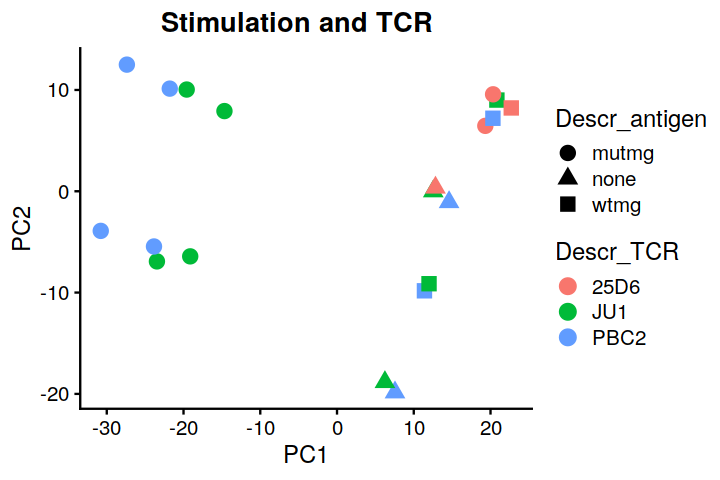

In [49]:
width <- 6
height <- 4
set_figsize(width, height)
pca_plot <- plotPCA(object, intgroup = c('Descr_TCR', 'Descr_antigen'), returnData = TRUE)
#percentVar <- round(100 * attr(pcaData, "percentVar"))
pca_plot <- ggplot(pca_plot, aes(PC1, PC2, color = Descr_TCR, shape = Descr_antigen)) +
    geom_point(size=4) +
    cowplot::theme_cowplot() + ggtitle('Stimulation and TCR') + 
    theme(plot.title = element_text(hjust = 0.45))
pca_plot
ggsave(pca_plot, file = paste0(dir.outs, 'stimulation_TCR', '_pca.pdf'), width = width, height = height)

# Check the markers on heatmap

In [50]:
dir.outs <- './heatmaps/'
dir.create(dir.outs)

Warning message in dir.create(dir.outs):
“'./heatmaps' already exists”


In [127]:
#normalize the object
dds <- estimateSizeFactors(dds)
object <- dds

In [176]:
meta

Well,Barcode,Loaded,UniqueSampleID,Batch,Organism,BiologicalRep,TechnicalRep,Descr_culture.condition,Descr_TCR,Descr_coculture.time,Descr_antigen
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A8,ATTATTCG,1,TILPBC2-mutmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,mutmg
B8,ATTGTGTT,1,TILJU1-mutmg-12h,A,hsa,BR1,TR1,TIL,JU1,12h,mutmg
C8,ATTCGTGT,1,NEWPBC2-mutmg-12h,A,hsa,BR1,TR1,NEW,PBC2,12h,mutmg
D8,TCAATGGA,1,NEWJU1-mutmg-12h,A,hsa,BR1,TR1,NEW,JU1,12h,mutmg
E8,ATGGTTCA,1,NEW25D6-mutmg-12h,A,hsa,BR1,TR1,NEW,25D6,12h,mutmg
F8,ATCACGCA,1,IL2JU1-mutmg-12h,A,hsa,BR1,TR1,IL2,JU1,12h,mutmg
G8,GATAGCGC,1,IL2PBC2-mutmg-12h,A,hsa,BR1,TR1,IL2,PBC2,12h,mutmg
H8,AGAAGACG,1,TILPBC2-wtmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,wtmg
A9,TAATAATC,1,TILJU1-wtmg-12h,A,hsa,BR1,TR1,TIL,JU1,12h,wtmg


## Create and normalize expression matrices for all conditions

In [180]:
object_plot <- object[, object$Descr_coculture.time == '12h']

#Subset the normalized counts
counts <- counts(object_plot, normalized=TRUE)
counts <- data.frame(counts)
counts$genes <- rownames(counts)
counts <- pivot_longer(counts, cols = 1:(ncol(counts)-1), names_to = "Barcode", values_to = "expression")
counts <- merge(counts, meta, by = 'Barcode')

#Create the FC against 25D6 counterparts
matrix_to_norm <- subset(counts, Descr_antigen == 'mutmg') 
unique_genes <- unique(matrix_to_norm$genes)
results <- c()
for(i in 1:length(unique_genes)){
    matrix_subset <- subset(matrix_to_norm, genes == unique_genes[i])
    value_25D6 <- subset(matrix_subset, Descr_TCR == '25D6')$expression + 0.0001
    matrix_subset$FC <- matrix_subset$expression / value_25D6
    matrix_subset$logFC <- log2(matrix_subset$FC )
    results <- rbind(results, matrix_subset)
}
mutmg_12h <- results

In [181]:
#Create the FC against 25D6 counterparts for wt
matrix_to_norm <- subset(counts, Descr_antigen == 'wtmg') 
unique_genes <- unique(matrix_to_norm$genes)
results <- c()
for(i in 1:length(unique_genes)){
    matrix_subset <- subset(matrix_to_norm, genes == unique_genes[i])
    value_25D6 <- subset(matrix_subset, Descr_TCR == '25D6')$expression + 0.0001
    matrix_subset$FC <- matrix_subset$expression / value_25D6
    matrix_subset$logFC <- log2(matrix_subset$FC )
    results <- rbind(results, matrix_subset)
}
wtmg_12h <- results

In [209]:
object_plot <- object[, object$Descr_coculture.time == '24h']

#Subset the normalized counts
counts <- counts(object_plot, normalized=TRUE)
counts <- data.frame(counts)
counts$genes <- rownames(counts)
counts <- pivot_longer(counts, cols = 1:(ncol(counts)-1), names_to = "Barcode", values_to = "expression")
counts <- merge(counts, meta, by = 'Barcode')

#Create the FC against 25D6 counterparts
matrix_to_norm <- counts
unique_genes <- unique(matrix_to_norm$genes)
results <- c()
for(i in 1:length(unique_genes)){
    matrix_subset <- subset(matrix_to_norm, genes == unique_genes[i])
    value_25D6 <- subset(matrix_subset, Descr_TCR == '25D6')$expression + 0.0001
    matrix_subset$FC <- matrix_subset$expression / value_25D6
    matrix_subset$logFC <- log2(matrix_subset$FC )
    results <- rbind(results, matrix_subset)
}
mutmg_24h <- results
mutmg_24h

,Barcode,genes,expression,Well,Loaded,UniqueSampleID,Batch,Organism,BiologicalRep,TechnicalRep,Descr_culture.condition,Descr_TCR,Descr_coculture.time,Descr_antigen,FC,logFC
,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,AGAAGCTT,CHCHD2P6,0.8372711,H9,1,NEWJU1-mutmg-24h,A,hsa,BR1,TR1,NEW,JU1,24h,mutmg,8.372711e+03,1.303148e+01
40478,ATGAAGGA,CHCHD2P6,1.6489779,C10,1,IL2JU1-mutmg-24h,A,hsa,BR1,TR1,IL2,JU1,24h,mutmg,1.648978e+04,1.400928e+01
66721,ATTATCGC,CHCHD2P6,0.0000000,A10,1,NEW25D6-mutmg-24h,A,hsa,BR1,TR1,NEW,25D6,24h,mutmg,0.000000e+00,-Inf
100023,GAGTTCTG,CHCHD2P6,0.7366199,F9,1,TILJU1-mutmg-24h,A,hsa,BR1,TR1,TIL,JU1,24h,mutmg,7.366199e+03,1.284670e+01
144125,TACATCCT,CHCHD2P6,0.0000000,B10,1,IL2PBC2-mutmg-24h,A,hsa,BR1,TR1,IL2,PBC2,24h,mutmg,0.000000e+00,-Inf
166496,TATAGTGT,CHCHD2P6,0.0000000,G9,1,NEWPBC2-mutmg-24h,A,hsa,BR1,TR1,NEW,PBC2,24h,mutmg,0.000000e+00,-Inf
200027,TCCAACGG,CHCHD2P6,0.7194997,E9,1,TILPBC2-mutmg-24h,A,hsa,BR1,TR1,TIL,PBC2,24h,mutmg,7.194997e+03,1.281278e+01
2,AGAAGCTT,CHCHD6,30.1417581,H9,1,NEWJU1-mutmg-24h,A,hsa,BR1,TR1,NEW,JU1,24h,mutmg,1.481120e+00,5.666883e-01
40541,ATGAAGGA,CHCHD6,44.5224042,C10,1,IL2JU1-mutmg-24h,A,hsa,BR1,TR1,IL2,JU1,24h,mutmg,2.187763e+00,1.129456e+00


In [ ]:
object_plot <- object[, object$Descr_coculture.time == '0h']

#Subset the normalized counts
counts <- counts(object_plot, normalized=TRUE)
counts <- data.frame(counts)
counts$genes <- rownames(counts)
counts <- pivot_longer(counts, cols = 1:(ncol(counts)-1), names_to = "Barcode", values_to = "expression")
counts <- merge(counts, meta, by = 'Barcode')

#Create the FC against 25D6 counterparts
matrix_to_norm <- counts
unique_genes <- unique(matrix_to_norm$genes)
results <- c()
for(i in 1:length(unique_genes)){
    matrix_subset <- subset(matrix_to_norm, genes == unique_genes[i])
    value_25D6 <- subset(matrix_subset, Descr_TCR == '25D6')$expression + 0.0001
    matrix_subset$FC <- matrix_subset$expression / value_25D6
    matrix_subset$logFC <- log2(matrix_subset$FC )
    results <- rbind(results, matrix_subset)
}
none_0h <- results

In [210]:
mutmg_12h <- mutmg_12h[order(mutmg_12h$logFC, decreasing = TRUE), ]
wtmg_12h <- wtmg_12h[order(wtmg_12h$logFC, decreasing = TRUE), ]
mutmg_24h <- mutmg_24h[order(mutmg_24h$logFC, decreasing = TRUE), ]
none_0h <- none_0h[order(none_0h$logFC, decreasing = TRUE), ]

In [211]:
write.csv(mutmg_12h, file = paste0(dir.outs, 'mutmg_12h', '.csv'))
write.csv(wtmg_12h, file = paste0(dir.outs, 'wtmg_12h', '.csv'))
write.csv(mutmg_24h, file = paste0(dir.outs, 'mutmg_24h', '.csv'))
write.csv(none_0h, file = paste0(dir.outs, 'none_0h', '.csv'))

In [212]:
combined_norm_matrix <- rbind(mutmg_12h, wtmg_12h, mutmg_24h, none_0h)
write.csv(combined_norm_matrix, file = paste0(dir.outs, 'combined_norm_matrix', '.csv'))

## Prepare matrices for plots

In [51]:
combined_norm_matrix <- read.csv(file = './heatmaps/combined_norm_matrix.csv')
head(combined_norm_matrix)

,X,Barcode,genes,expression,Well,Loaded,UniqueSampleID,Batch,Organism,BiologicalRep,TechnicalRep,Descr_culture.condition,Descr_TCR,Descr_coculture.time,Descr_antigen,FC,logFC
,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,298440,ATTGTGTT,IL1A,56.47161,B8,1,TILJU1-mutmg-12h,A,hsa,BR1,TR1,TIL,JU1,12h,mutmg,564716.1,19.10717
2,369189,TCAATGGA,FLT1,44.08852,D8,1,NEWJU1-mutmg-12h,A,hsa,BR1,TR1,NEW,JU1,12h,mutmg,440885.2,18.75004
3,177177,ATTATTCG,IL1A,42.77131,A8,1,TILPBC2-mutmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,mutmg,427713.1,18.70628
4,192649,ATTATTCG,GUCY1A1,36.90074,A8,1,TILPBC2-mutmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,mutmg,369007.4,18.49329
5,225993,ATTCGTGT,PHEX,34.02834,C8,1,NEWPBC2-mutmg-12h,A,hsa,BR1,TR1,NEW,PBC2,12h,mutmg,340283.4,18.37638
6,173861,ATTATTCG,LMCD1,31.03017,A8,1,TILPBC2-mutmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,mutmg,310301.7,18.24331


In [52]:
combined_norm_matrix$Descr_coculture.time <- factor(combined_norm_matrix$Descr_coculture.time, levels = c('0h', '12h', '24h'))

In [53]:
combined_norm_matrix$combined_info <- paste(combined_norm_matrix$Descr_coculture.time, combined_norm_matrix$Descr_antigen, 
                                            combined_norm_matrix$Descr_culture.condition, combined_norm_matrix$Descr_TCR, sep = '_')

combined_info_values <- unique(combined_norm_matrix$combined_info)
combined_info_values <- combined_info_values[order(combined_info_values)]

combined_norm_matrix$combined_info <- factor(combined_norm_matrix$combined_info, levels = combined_info_values)

In [54]:
combined_norm_matrix$combined_time_antigen <- paste(combined_norm_matrix$Descr_coculture.time, combined_norm_matrix$Descr_antigen)
combined_time_antigen_values <- unique(combined_norm_matrix$combined_time_antigen)
combined_time_antigen_values <- combined_time_antigen_values[order(combined_time_antigen_values)]

combined_norm_matrix$combined_time_antigen <- factor(combined_norm_matrix$combined_time_antigen, levels = combined_time_antigen_values)

In [55]:
combined_norm_matrix$combined_time_antigen_cond <- paste(combined_norm_matrix$Descr_coculture.time, combined_norm_matrix$Descr_antigen, combined_norm_matrix$Descr_culture.condition)
combined_time_antigen_cond_values <- unique(combined_norm_matrix$combined_time_antigen_cond)
combined_time_antigen_cond_values <- combined_time_antigen_cond_values[order(combined_time_antigen_cond_values)]

combined_norm_matrix$combined_time_antigen_cond <- factor(combined_norm_matrix$combined_time_antigen_cond, levels = combined_time_antigen_cond_values)

In [56]:
combined_norm_matrix$Descr_antigen <- factor(combined_norm_matrix$Descr_antigen, levels = c('none', 'wtmg', 'mutmg'))

In [57]:
combined_norm_matrix$Descr_culture.condition <- factor(combined_norm_matrix$Descr_culture.condition, levels = c('TIL', 'NEW', 'IL2'))

In [58]:
combined_norm_matrix <- subset(combined_norm_matrix, Descr_TCR != '25D6')
combined_norm_matrix <- subset(combined_norm_matrix, Descr_culture.condition != 'IL2')

# Start plotting

In [59]:
dir_plots <- './heatmaps/plots/'
dir.create(dir_plots)

Warning message in dir.create(dir_plots):
“'./heatmaps/plots' already exists”


[1] "IL1A"   "IL1B"   "IL2"    "IL3"    "IL4"    "IL5"    "IL6"    "IL7"   
 [9] "CXCL8"  "IL9"    "IL10"   "IL11"   "IL12A"  "IL12B"  "IL13"   "IL15"  
[17] "IL16"   "IL17A"  "IL17C"  "IL17D"  "IL17F"  "IL18"   "IL19"   "IL21"  
[25] "IL22"   "IL23A"  "IL24"   "IL26"   "IL27"   "IL31"   "IL32"   "IL34"  
[33] "IL36A"  "IL36G"  "IL36RN" "IL37"

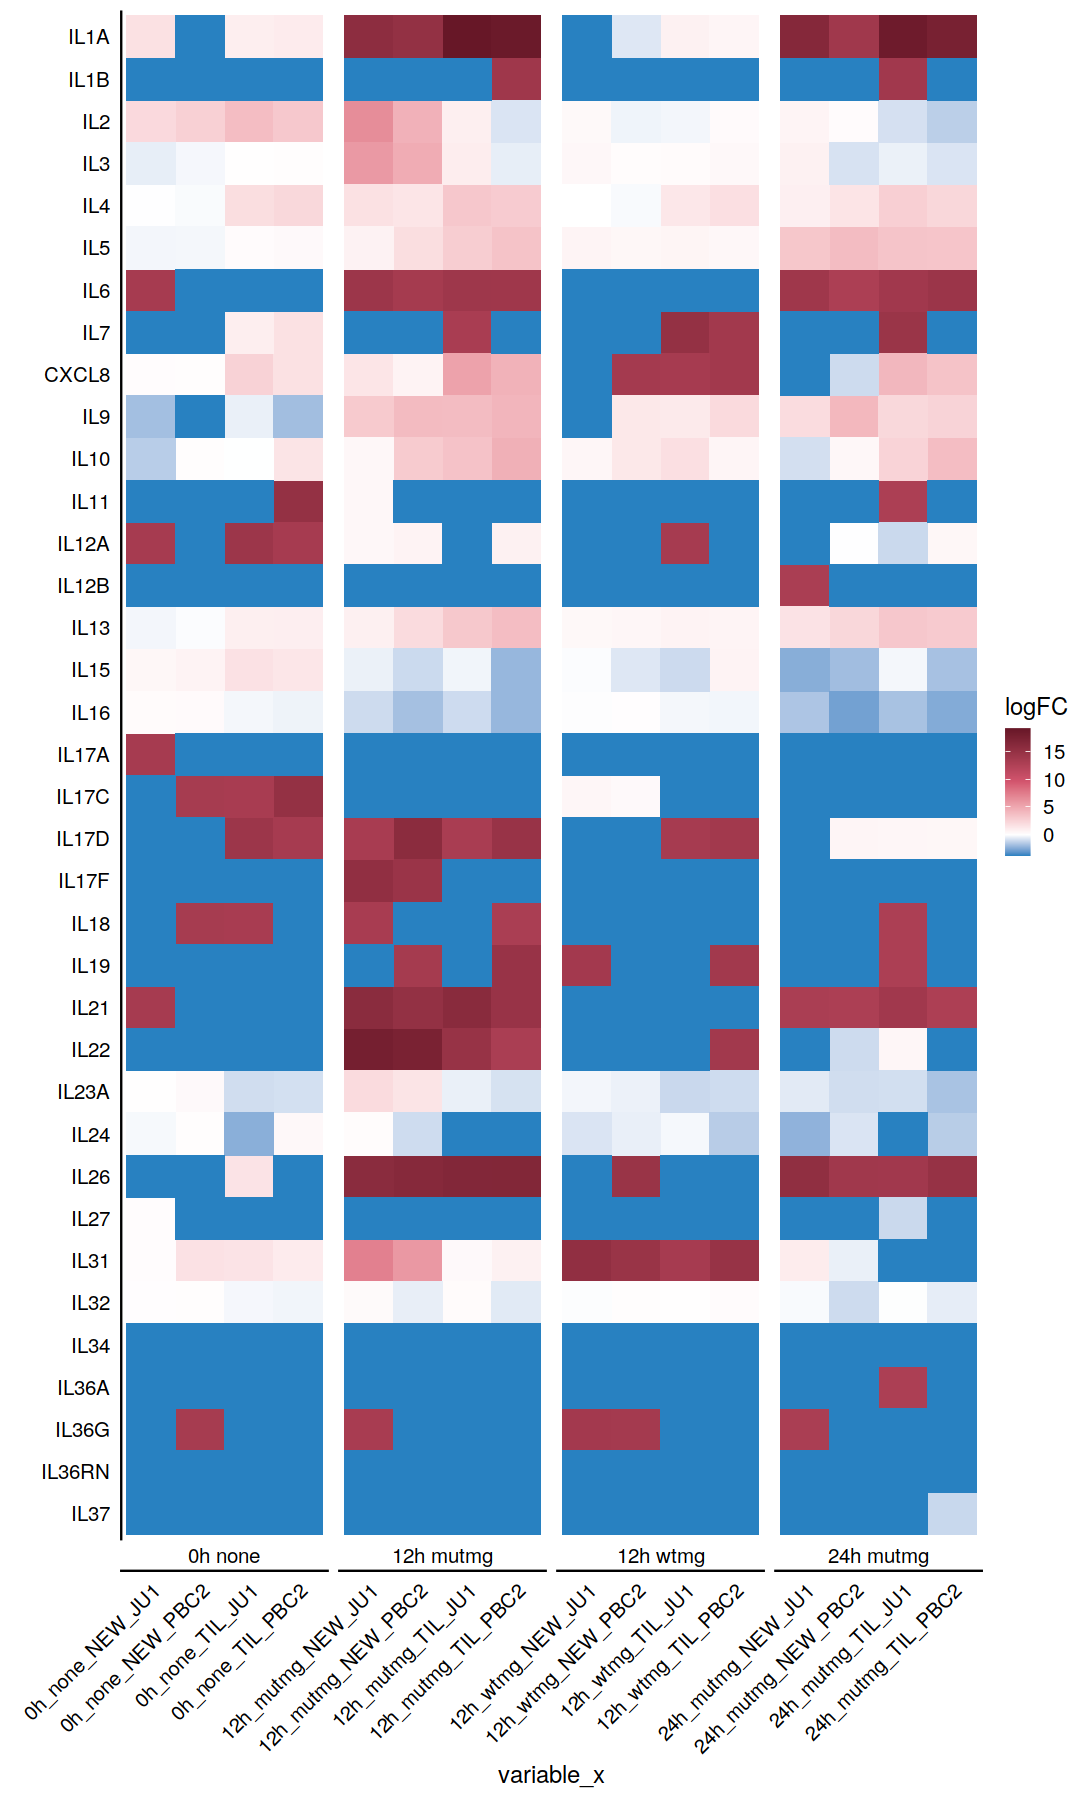

In [387]:
width <- 9
height <- 15
name <- 'interleukins'

genes_to_plot <- read.csv('./heatmaps/interleukins.csv', sep = ',', header = FALSE)
genes_to_plot <- genes_to_plot$V2 
genes_to_plot <- genes_to_plot[genes_to_plot %in% combined_norm_matrix$genes]
genes_to_plot <- unique(genes_to_plot)
#genes_to_plot <- genes_to_plot[order(genes_to_plot, decreasing = TRUE)]
genes_to_plot

df <- subset(combined_norm_matrix, genes %in% genes_to_plot)
df$genes <- factor(df$genes, levels = rev(genes_to_plot))
df$logFC[df$logFC == -Inf] <- NA
min.value <- min(df$logFC[!(is.na(df$logFC))])
df$logFC[is.na(df$logFC)] <- min.value
df$variable_x <- df$combined_info
max.value <- max(df$logFC)
my.aspect.ratio <- length(unique(df$variable_x))



set_figsize(width, height)
plot <- ggplot(df, aes(x = variable_x, y = genes, fill = logFC)) + 
  geom_tile() + 
  cowplot::theme_cowplot() + 
  #grids(linetype = "dashed", size = 0.1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  ylab('') +
  theme(axis.ticks = element_blank()) +
  scale_fill_gradientn(colours = c("#2881C1", "white", "#D3556E", "#671727"), values = scales::rescale(c(min.value, 0, max.value/2, max.value))) + 
  facet_grid(~combined_time_antigen, switch = "x", scales = "free_x", space = 'free_x') + theme(strip.background = element_blank(), strip.text.y = element_blank())#+ coord_equal()

plot
ggsave(plot, file=paste0(dir_plots, name, '.pdf'), width = width, height = height)

[1] "IFNG"  "IL2"   "IL4"   "IL6"   "IL10"  "TNF"   "FAS"   "FASLG" "GZMA" 
[10] "GZMB"  "GZMH"  "GZMK"  "GNLY"

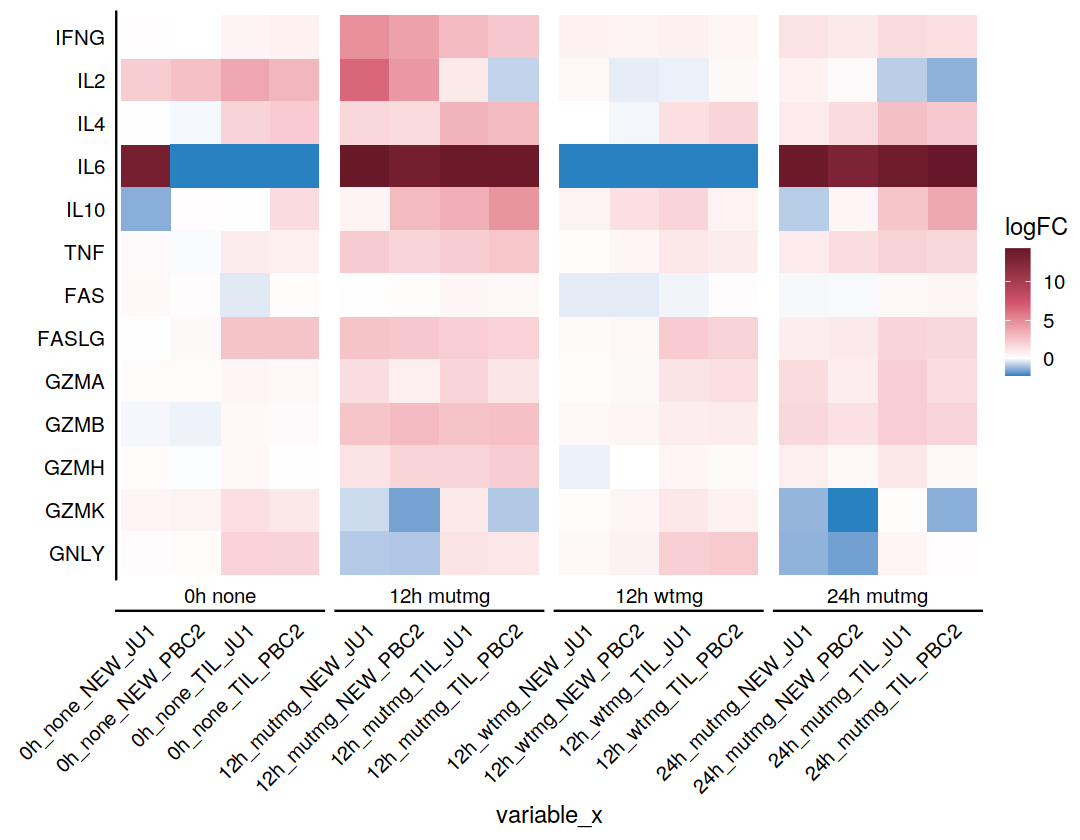

In [388]:
width <- 9
height <- 7
name <- 'cytokine_panel_franzi'

genes_to_plot <- c('IFNG', 'IL2', 'IL4', 'IL6', 'IL10', 'TNF', 'FAS', 'FASLG', 'GZMA', 'GZMB', 'GZMH', 'GZMK', 'PRF', 'GNLY')
genes_to_plot <- genes_to_plot[genes_to_plot %in% combined_norm_matrix$genes]
genes_to_plot

df <- subset(combined_norm_matrix, genes %in% genes_to_plot)
df$genes <- factor(df$genes, levels = rev(genes_to_plot))
df$logFC[df$logFC == -Inf] <- NA
min.value <- min(df$logFC[!(is.na(df$logFC))])
df$logFC[is.na(df$logFC)] <- min.value
df$variable_x <- df$combined_info
max.value <- max(df$logFC)
my.aspect.ratio <- length(unique(df$variable_x))



set_figsize(width, height)
plot <- ggplot(df, aes(x = variable_x, y = genes, fill = logFC)) + 
  geom_tile() + 
  cowplot::theme_cowplot() + 
  #grids(linetype = "dashed", size = 0.1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  ylab('') +
  theme(axis.ticks = element_blank()) +
  scale_fill_gradientn(colours = c("#2881C1", "white", "#D3556E", "#671727"), values = scales::rescale(c(min.value, 0, max.value/2, max.value))) + 
  facet_grid(~combined_time_antigen, switch = "x", scales = "free_x", space = 'free_x') + theme(strip.background = element_blank(), strip.text.y = element_blank())#+ coord_equal()

plot
ggsave(plot, file=paste0(dir_plots, name, '.pdf'), width = width, height = height)

[1] "IFNG" "IL2"  "TNF"  "GZMB" "IL10"

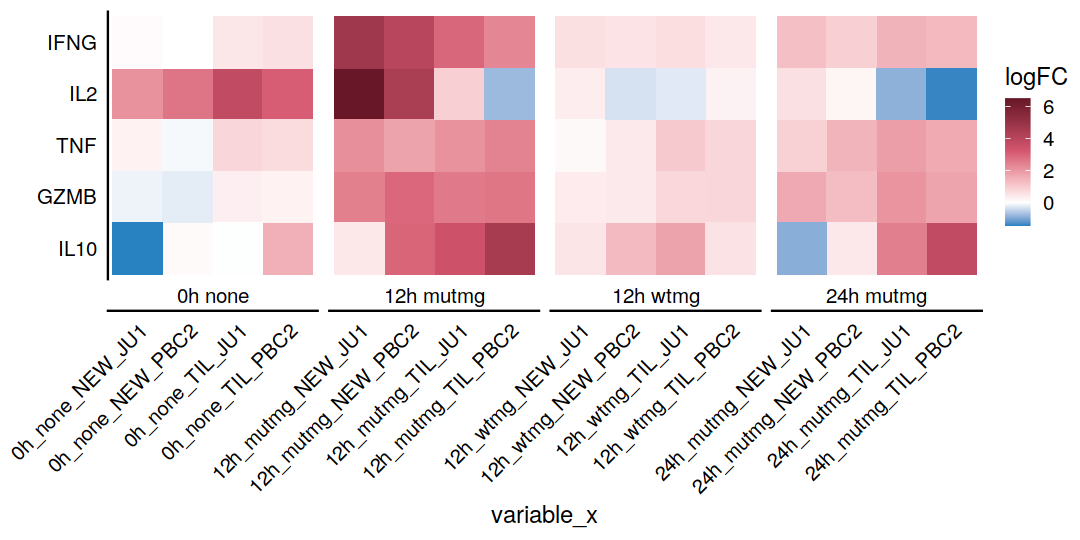

In [65]:
width <- 9
height <- 4.5
name <- 'cytokine_panel_final'

genes_to_plot <- c('IFNG', 'IL2', 'TNF', 'GZMB', 'IL10')
genes_to_plot <- genes_to_plot[genes_to_plot %in% combined_norm_matrix$genes]
genes_to_plot

df <- subset(combined_norm_matrix, genes %in% genes_to_plot)
df$genes <- factor(df$genes, levels = rev(genes_to_plot))
df$logFC[df$logFC == -Inf] <- NA
min.value <- min(df$logFC[!(is.na(df$logFC))])
df$logFC[is.na(df$logFC)] <- min.value
df$variable_x <- df$combined_info
max.value <- max(df$logFC)
my.aspect.ratio <- length(unique(df$variable_x))



set_figsize(width, height)
plot <- ggplot(df, aes(x = variable_x, y = genes, fill = logFC)) + 
  geom_tile() + 
  cowplot::theme_cowplot() + 
  #grids(linetype = "dashed", size = 0.1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  ylab('') +
  theme(axis.ticks = element_blank()) +
  scale_fill_gradientn(colours = c("#2881C1", "white", "#D3556E", "#671727"), values = scales::rescale(c(min.value, 0, max.value/2, max.value))) + 
  facet_grid(~combined_time_antigen, switch = "x", scales = "free_x", space = 'free_x') + theme(strip.background = element_blank(), strip.text.y = element_blank())#+ coord_equal()

plot
ggsave(plot, file=paste0(dir_plots, name, '.pdf'), width = width, height = height)

[1] "LAG3"    "HAVCR2"  "TIGIT"   "PDCD1"   "TNFRSF9"

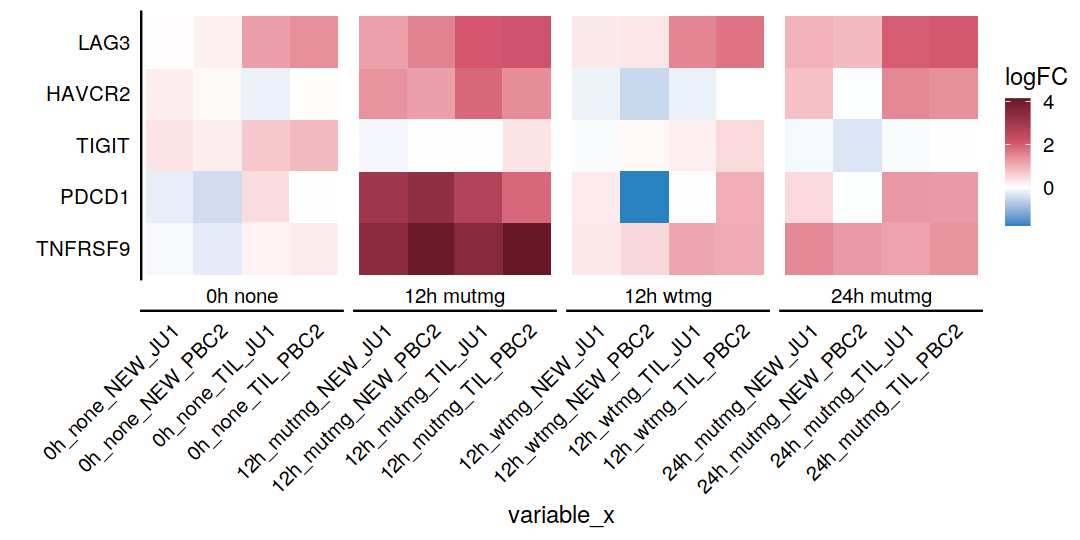

In [396]:
width <- 9
height <- 4.5
name <- 'exhaustion'

genes_to_plot <- c('LAG3', 'HAVCR2', 'TIGIT', 'PDCD1', 'TNFRSF9')
genes_to_plot <- genes_to_plot[genes_to_plot %in% combined_norm_matrix$genes]
genes_to_plot

df <- subset(combined_norm_matrix, genes %in% genes_to_plot)
df$genes <- factor(df$genes, levels = rev(genes_to_plot))
df$logFC[df$logFC == -Inf] <- NA
min.value <- min(df$logFC[!(is.na(df$logFC))])
df$logFC[is.na(df$logFC)] <- min.value
df$variable_x <- df$combined_info
max.value <- max(df$logFC)
my.aspect.ratio <- length(unique(df$variable_x))



set_figsize(width, height)
plot <- ggplot(df, aes(x = variable_x, y = genes, fill = logFC)) + 
  geom_tile() + 
  cowplot::theme_cowplot() + 
  #grids(linetype = "dashed", size = 0.1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  ylab('') +
  theme(axis.ticks = element_blank()) +
  scale_fill_gradientn(colours = c("#2881C1", "white", "#D3556E", "#671727"), values = scales::rescale(c(min.value, 0, max.value/2, max.value))) + 
  facet_grid(~combined_time_antigen, switch = "x", scales = "free_x", space = 'free_x') + theme(strip.background = element_blank(), strip.text.y = element_blank())#+ coord_equal()

plot
ggsave(plot, file=paste0(dir_plots, name, '.pdf'), width = width, height = height)

[1] "CXCR1"   "CXCR2"   "IL1RAP"  "IL1RL1"  "IL1RL2"  "IL1R1"   "IL1R2"  
 [8] "IL2RA"   "IL2RB"   "IL2RG"   "IL4R"    "IL5RA"   "IL6R"    "IL6ST"  
[15] "IL7R"    "IL10RA"  "IL10RB"  "IL11RA"  "IL12RB1" "IL12RB2" "IL13RA1"
[22] "IL15RA"  "IL17RA"  "IL17RB"  "IL17RC"  "IL17RE"  "IL18RAP" "IL18R1" 
[29] "IL20RA"  "IL20RB"  "IL21R"   "IL22RA2" "IL27RA"  "IL31RA"

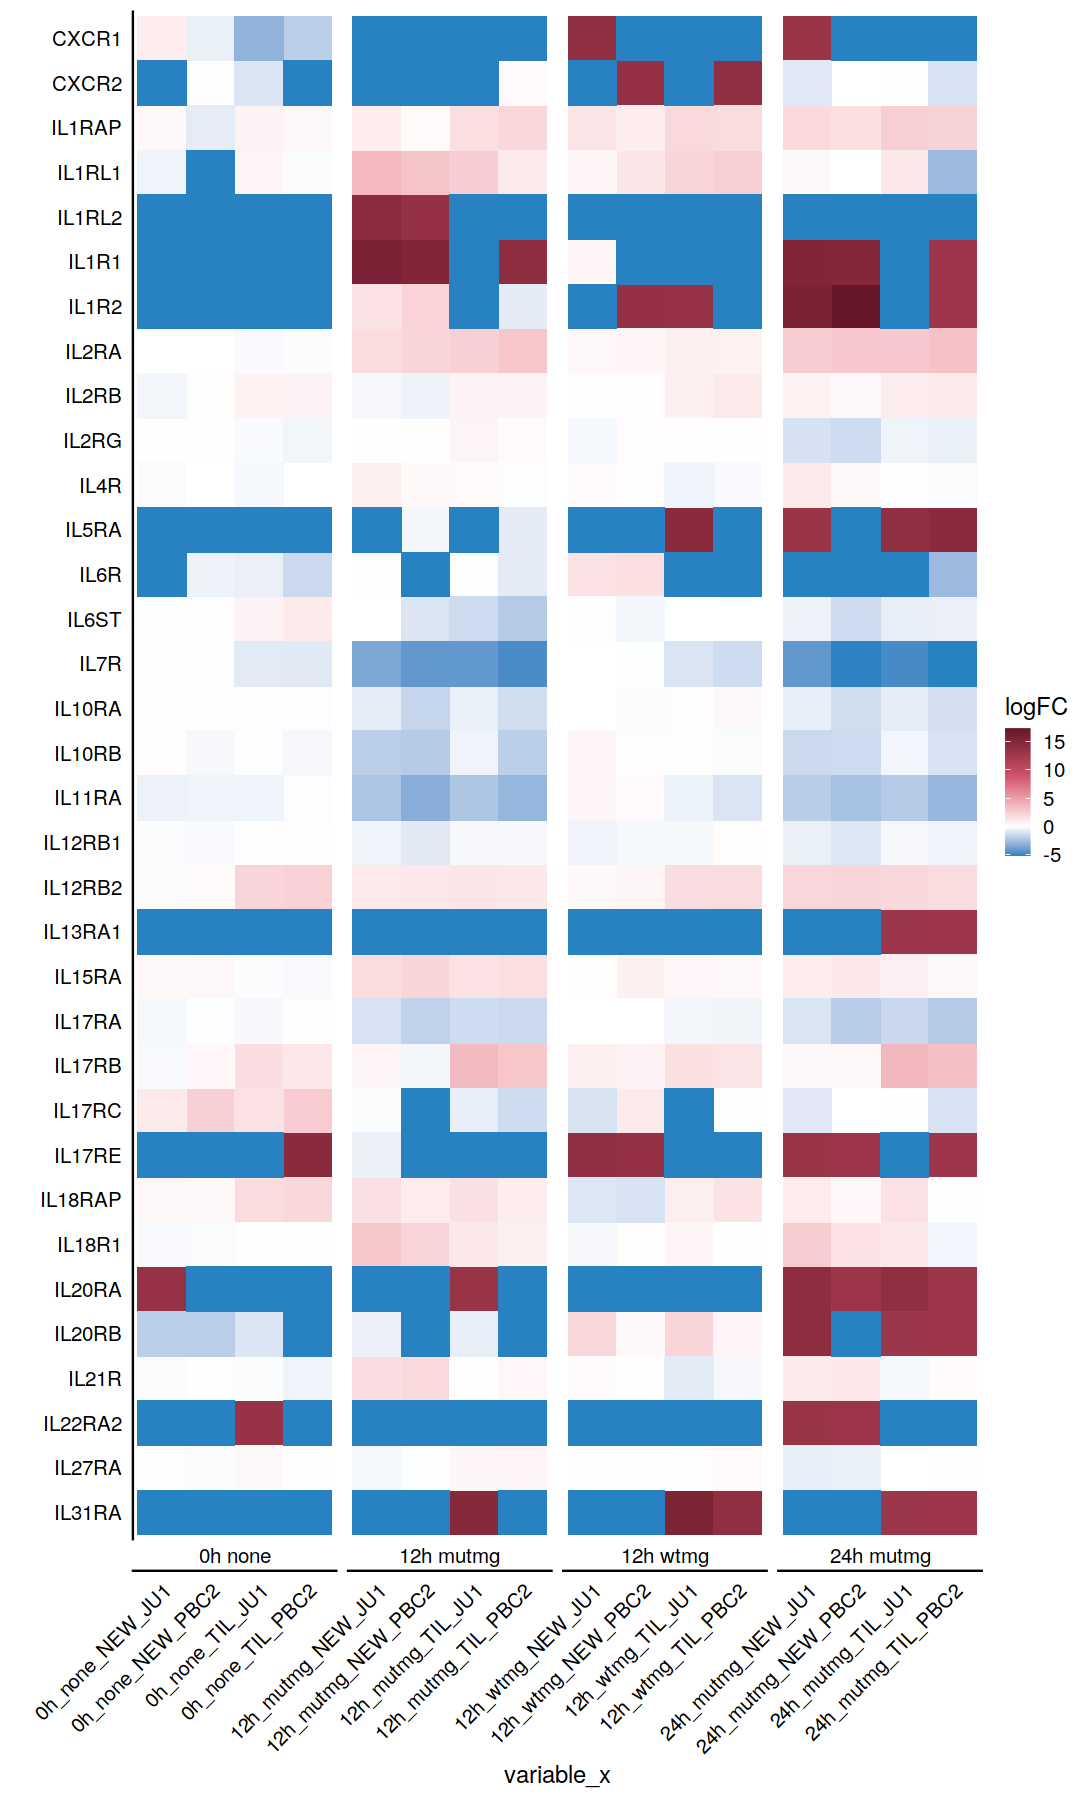

In [397]:
width <- 9
height <- 15
name <- 'interleukin_receptors'

genes_to_plot <- read.csv('./heatmaps/interleukin_r.csv', sep = ',', header = FALSE)
genes_to_plot <- genes_to_plot$V2 
genes_to_plot <- genes_to_plot[genes_to_plot %in% combined_norm_matrix$genes]
genes_to_plot <- unique(genes_to_plot)
#genes_to_plot <- genes_to_plot[order(genes_to_plot, decreasing = TRUE)]
genes_to_plot

df <- subset(combined_norm_matrix, genes %in% genes_to_plot)
df$genes <- factor(df$genes, levels = rev(genes_to_plot))
df$logFC[df$logFC == -Inf] <- NA
min.value <- min(df$logFC[!(is.na(df$logFC))])
df$logFC[is.na(df$logFC)] <- min.value
df$variable_x <- df$combined_info
max.value <- max(df$logFC)
my.aspect.ratio <- length(unique(df$variable_x))



set_figsize(width, height)
plot <- ggplot(df, aes(x = variable_x, y = genes, fill = logFC)) + 
  geom_tile() + 
  cowplot::theme_cowplot() + 
  #grids(linetype = "dashed", size = 0.1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  ylab('') +
  theme(axis.ticks = element_blank()) +
  scale_fill_gradientn(colours = c("#2881C1", "white", "#D3556E", "#671727"), values = scales::rescale(c(min.value, 0, max.value/2, max.value))) + 
  facet_grid(~combined_time_antigen, switch = "x", scales = "free_x", space = 'free_x') + theme(strip.background = element_blank(), strip.text.y = element_blank())#+ coord_equal()

plot
ggsave(plot, file=paste0(dir_plots, name, '.pdf'), width = width, height = height)

[1] "CCL1"   "CCL2"   "CCL3"   "CCL3L1" "CCL4"   "CCL4L2" "CCL5"   "CCL7"  
 [9] "CCL13"  "CCL16"  "CCL17"  "CCL18"  "CCL19"  "CCL20"  "CCL22"  "CCL23" 
[17] "CCL24"  "CCL25"  "CCL26"  "CCL27"  "CCL28"  "CXCL3"  "CXCL5"  "CXCL8" 
[25] "CXCL9"  "CXCL10" "CXCL11" "CXCL13" "CXCL14" "CXCL16" "CXCL17" "XCL1"  
[33] "XCL2"

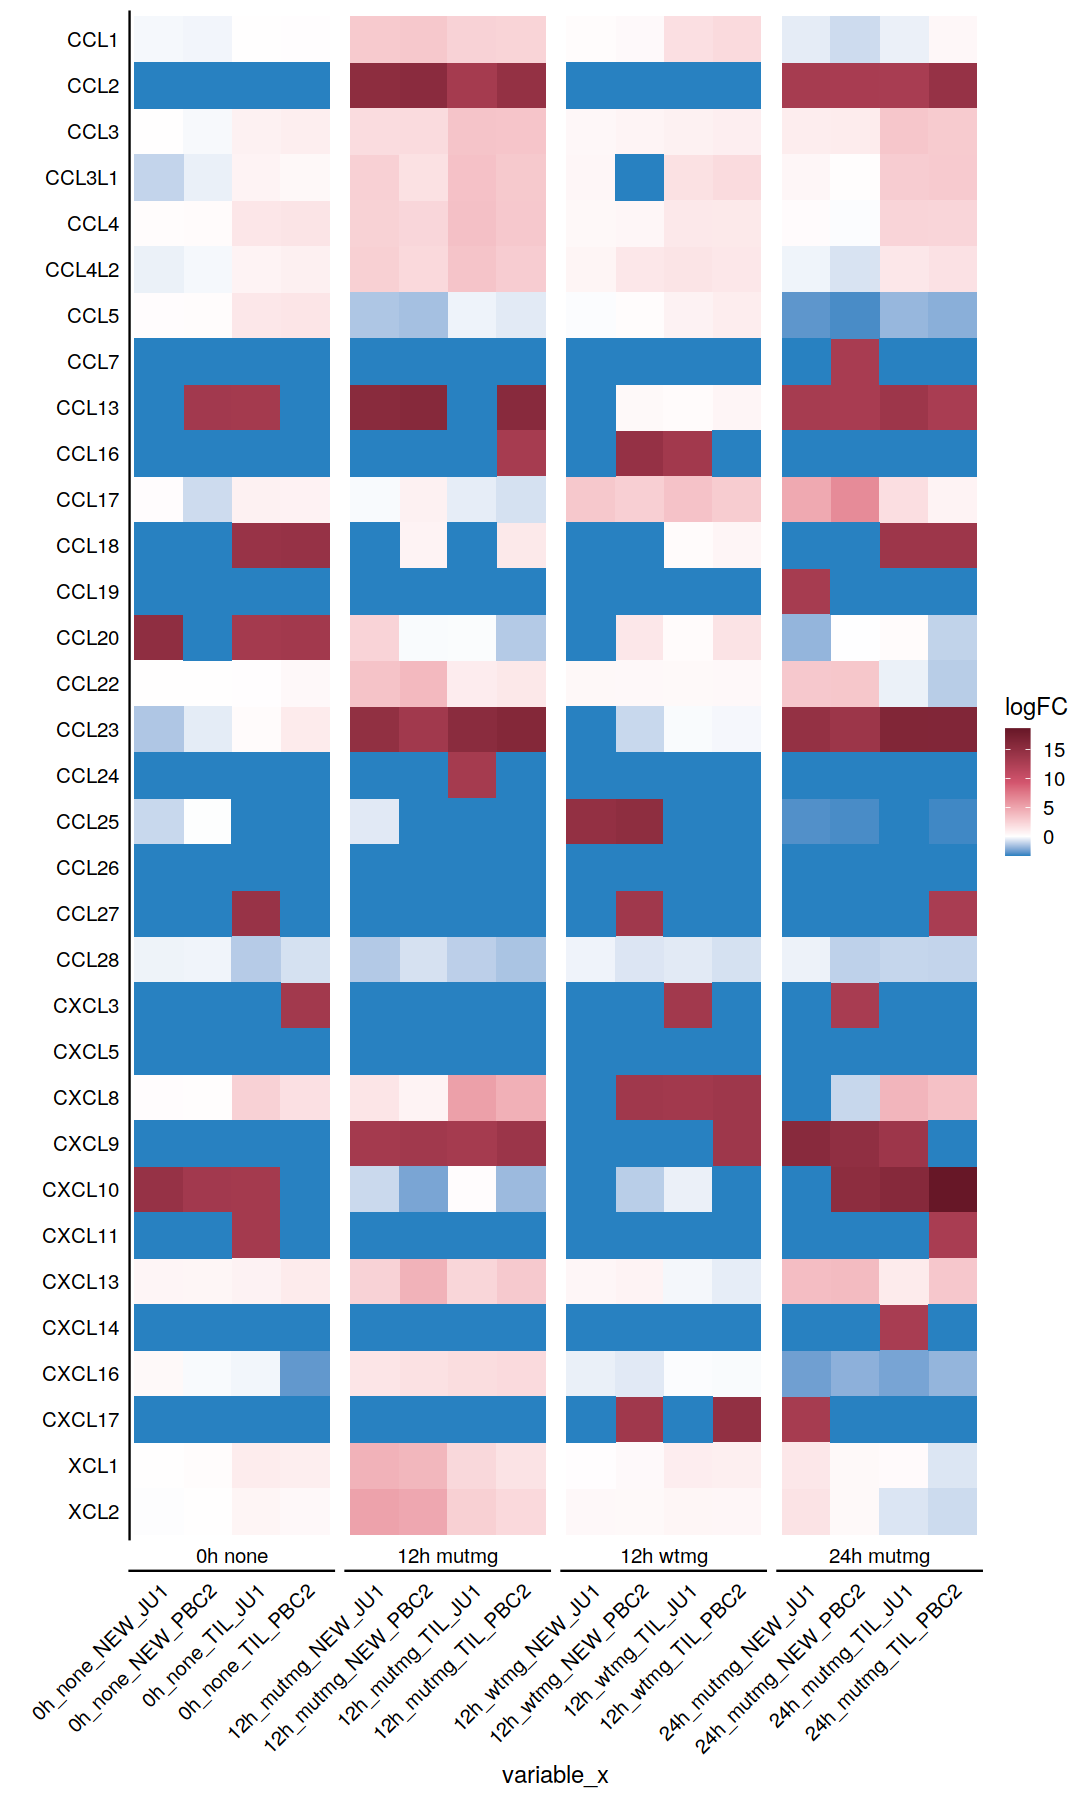

In [398]:
width <- 9
height <- 15
name <- 'chemokines'

genes_to_plot <- read.csv('./heatmaps/chemokines.csv', sep = ',', header = FALSE)
genes_to_plot <- genes_to_plot$V2 
genes_to_plot <- genes_to_plot[genes_to_plot %in% combined_norm_matrix$genes]
genes_to_plot <- unique(genes_to_plot)
#genes_to_plot <- genes_to_plot[order(genes_to_plot, decreasing = TRUE)]
genes_to_plot

df <- subset(combined_norm_matrix, genes %in% genes_to_plot)
df$genes <- factor(df$genes, levels = rev(genes_to_plot))
df$logFC[df$logFC == -Inf] <- NA
min.value <- min(df$logFC[!(is.na(df$logFC))])
df$logFC[is.na(df$logFC)] <- min.value
df$variable_x <- df$combined_info
max.value <- max(df$logFC)
my.aspect.ratio <- length(unique(df$variable_x))



set_figsize(width, height)
plot <- ggplot(df, aes(x = variable_x, y = genes, fill = logFC)) + 
  geom_tile() + 
  cowplot::theme_cowplot() + 
  #grids(linetype = "dashed", size = 0.1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  ylab('') +
  theme(axis.ticks = element_blank()) +
  scale_fill_gradientn(colours = c("#2881C1", "white", "#D3556E", "#671727"), values = scales::rescale(c(min.value, 0, max.value/2, max.value))) + 
  facet_grid(~combined_time_antigen, switch = "x", scales = "free_x", space = 'free_x') + theme(strip.background = element_blank(), strip.text.y = element_blank())#+ coord_equal()

plot
ggsave(plot, file=paste0(dir_plots, name, '.pdf'), width = width, height = height)

[1] "ACKR2"   "ACKR3"   "ACKR4"   "CCRL2"   "PITPNM3" "CCR1"    "CCR2"   
 [8] "CCR3"    "CCR4"    "CCR5"    "CCR6"    "CCR7"    "CCR8"    "CCR9"   
[15] "CCR10"   "CXCR1"   "CXCR2"   "CXCR3"   "CXCR4"   "CXCR5"   "CXCR6"  
[22] "CX3CR1"  "XCR1"

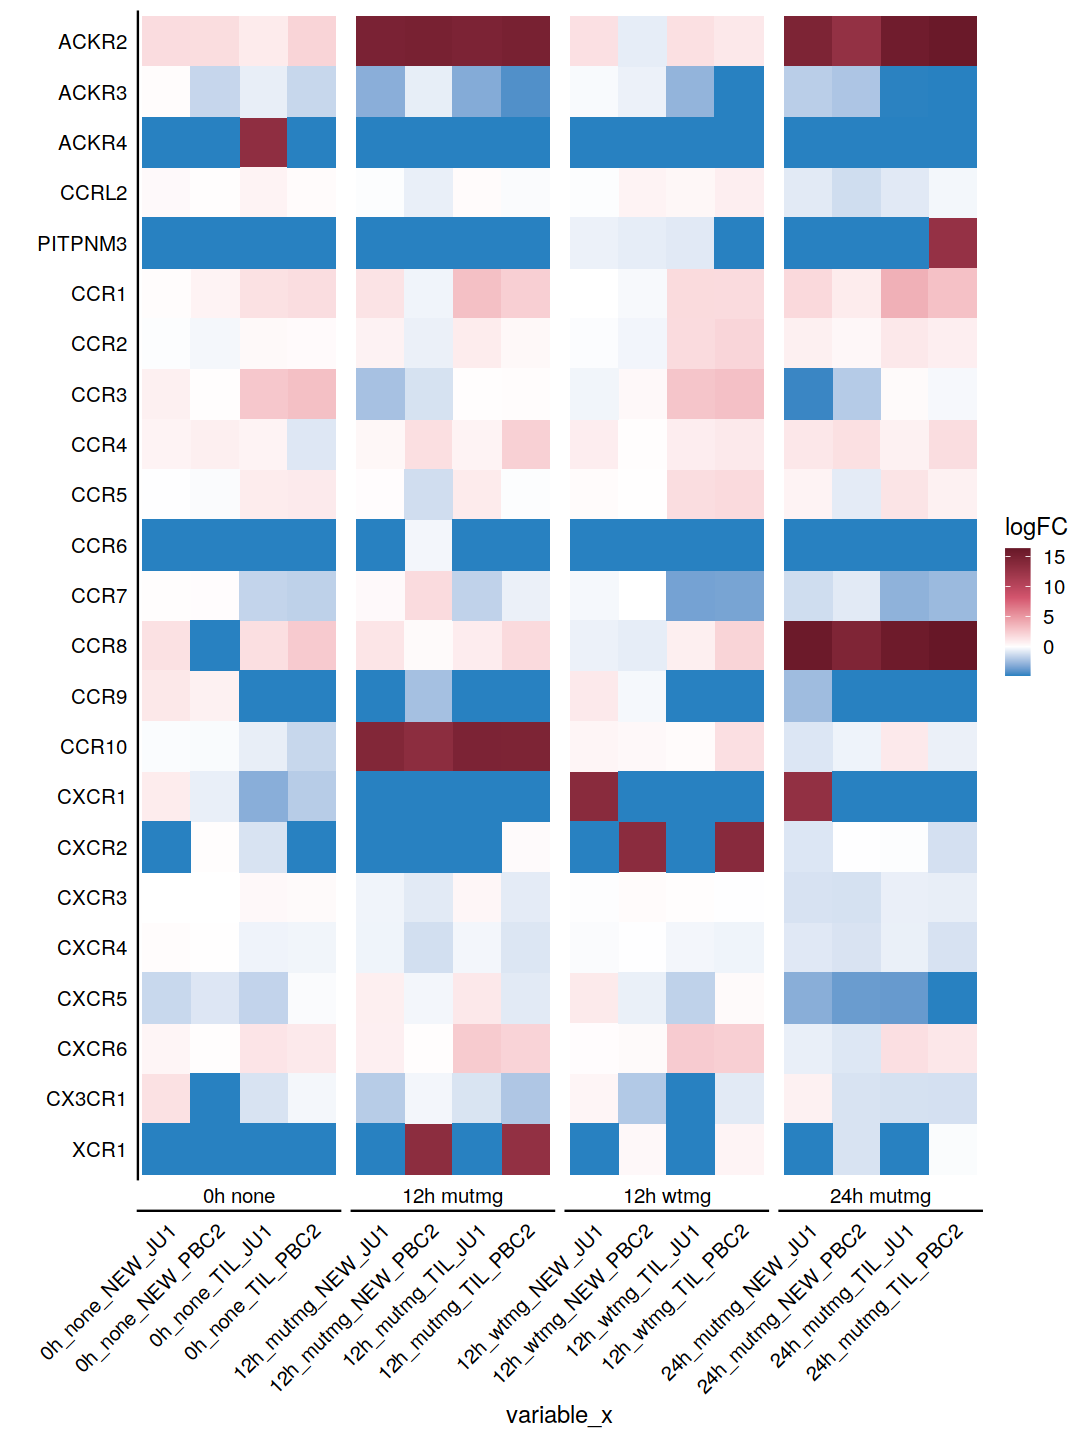

In [402]:
width <- 9
height <- 12
name <- 'chemokine_receptors'

genes_to_plot <- read.csv('./heatmaps/chem_receptors.csv', sep = ',', header = FALSE)
genes_to_plot <- genes_to_plot$V2 
genes_to_plot <- genes_to_plot[genes_to_plot %in% combined_norm_matrix$genes]
genes_to_plot <- unique(genes_to_plot)
#genes_to_plot <- genes_to_plot[order(genes_to_plot, decreasing = TRUE)]
genes_to_plot

df <- subset(combined_norm_matrix, genes %in% genes_to_plot)
df$genes <- factor(df$genes, levels = rev(genes_to_plot))
df$logFC[df$logFC == -Inf] <- NA
min.value <- min(df$logFC[!(is.na(df$logFC))])
df$logFC[is.na(df$logFC)] <- min.value
df$variable_x <- df$combined_info
max.value <- max(df$logFC)
my.aspect.ratio <- length(unique(df$variable_x))



set_figsize(width, height)
plot <- ggplot(df, aes(x = variable_x, y = genes, fill = logFC)) + 
  geom_tile() + 
  cowplot::theme_cowplot() + 
  #grids(linetype = "dashed", size = 0.1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  ylab('') +
  theme(axis.ticks = element_blank()) +
  scale_fill_gradientn(colours = c("#2881C1", "white", "#D3556E", "#671727"), values = scales::rescale(c(min.value, 0, max.value/2, max.value))) + 
  facet_grid(~combined_time_antigen, switch = "x", scales = "free_x", space = 'free_x') + theme(strip.background = element_blank(), strip.text.y = element_blank())#+ coord_equal()

plot
ggsave(plot, file=paste0(dir_plots, name, '.pdf'), width = width, height = height)

In [218]:
meta

Well,Barcode,Loaded,UniqueSampleID,Batch,Organism,BiologicalRep,TechnicalRep,Descr_culture.condition,Descr_TCR,Descr_coculture.time,Descr_antigen
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A8,ATTATTCG,1,TILPBC2-mutmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,mutmg
B8,ATTGTGTT,1,TILJU1-mutmg-12h,A,hsa,BR1,TR1,TIL,JU1,12h,mutmg
C8,ATTCGTGT,1,NEWPBC2-mutmg-12h,A,hsa,BR1,TR1,NEW,PBC2,12h,mutmg
D8,TCAATGGA,1,NEWJU1-mutmg-12h,A,hsa,BR1,TR1,NEW,JU1,12h,mutmg
E8,ATGGTTCA,1,NEW25D6-mutmg-12h,A,hsa,BR1,TR1,NEW,25D6,12h,mutmg
F8,ATCACGCA,1,IL2JU1-mutmg-12h,A,hsa,BR1,TR1,IL2,JU1,12h,mutmg
G8,GATAGCGC,1,IL2PBC2-mutmg-12h,A,hsa,BR1,TR1,IL2,PBC2,12h,mutmg
H8,AGAAGACG,1,TILPBC2-wtmg-12h,A,hsa,BR1,TR1,TIL,PBC2,12h,wtmg
A9,TAATAATC,1,TILJU1-wtmg-12h,A,hsa,BR1,TR1,TIL,JU1,12h,wtmg
